In [31]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
df = pd.read_csv('dataR2.csv')
shuffled_df = df.sample(frac=1)
X = df.iloc[:, :-1].to_numpy()
y = df.iloc[:, -1].to_numpy()
print('X.shape:', X.shape)
print('y.shape:', y.shape)
feature_names = df.columns[:-1]
target_names = ['Healthy controls', 'Patients']

X.shape: (116, 9)
y.shape: (116,)


# نمودارهای تک ویژگی

In [22]:
def draw_one_f_plot(feature1):
    for c in range(1, 3):
        #print(df[y == c].index)
        plt.plot(shuffled_df[y == c].index, X[y == c, feature1], 'rbg'[c-1] + 'o', label= target_names[c-1])
    plt.xlabel("Index")
    plt.ylabel(feature_names[feature1])
    plt.grid()
    plt.legend()

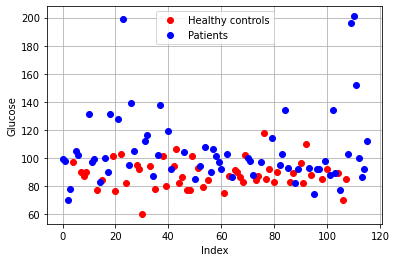

In [23]:
draw_one_f_plot(2)

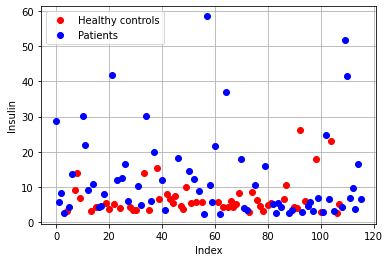

In [24]:
draw_one_f_plot(3)

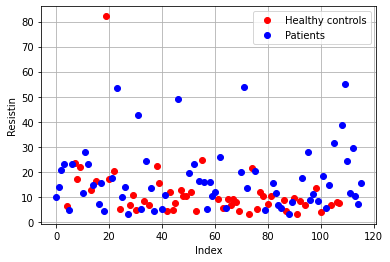

In [25]:
draw_one_f_plot(7)

## از بین تمامی ویژگی‌ها، ویژگی‌هایی که نمودارشان رسم شده است نسبت به بقیه بهتر قابل تفکیک کردنِ نمونه‌های بیمار و سالم بودند. اما به طور کلی نمیتوان گفت که تفکیک آنها به سادگی قابل انجام است.

# نمودارهای دو ویژگی

In [26]:
def draw_features_plot(feature1, feature2):
    for c in range(1, 3):
        plt.plot(X[y == c, feature1], X[y == c, feature2], 'rbg'[c-1] + 'o', label= target_names[c-1])
    plt.xlabel(feature_names[feature1])
    plt.ylabel(feature_names[feature2])
    plt.grid()
    plt.legend()

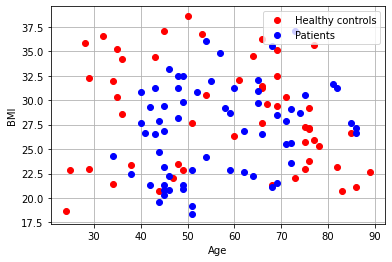

In [27]:
feature1 = 0
feature2 = 1
draw_features_plot(feature1, feature2)

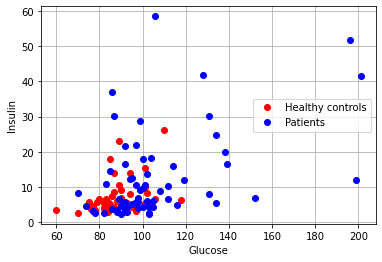

In [28]:
feature1 = 2
feature2 = 3
draw_features_plot(feature1, feature2)

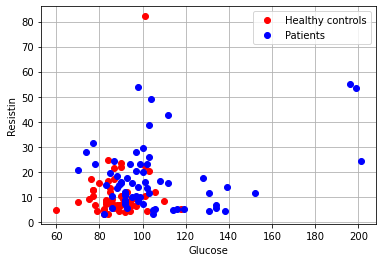

In [29]:
draw_features_plot(2, 7)

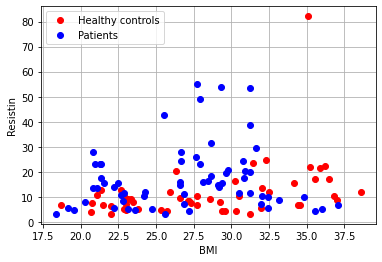

In [30]:
draw_features_plot(1, 7)

## از بین جفت مجموعه ویژگی‌های موجود، جفت‌هایی که تفکیک آنها با استفاده از منحنی‌های مختلف راحت‌تر به نظر آمد رسم شده اند. اما به طور کلی باز هم نمی‌توان گفت که ترکیب دو ویژگی نیز کمک زیادی برای دسته‌بندی نمونه‌های بیمار و سالم می‌کنند و باید از ترکیب تعداد بیشتری ویژگی( که قابل رسم نمی‌باشد) استفاده شود.

In [363]:
# Normalization
X = (X - X.mean(axis=0))/ X.std(axis=0)
print(X)

[[-0.57979363 -0.81667527 -1.23922225 ... -0.07022151 -0.54551749
  -0.34125061]
 [ 1.60182096 -1.37875056 -0.25829943 ... -0.69734988 -0.86421418
  -0.1912238 ]
 [ 1.53948912 -0.89176446 -0.30288683 ...  1.79799836 -0.4416602
   0.05821407]
 ...
 [ 0.47984774  0.89385486 -0.03536242 ...  1.81384272 -0.3563202
  -0.64049127]
 [ 0.91617066 -0.39854568 -0.70417344 ...  3.45903808 -0.92857684
  -0.41283214]
 [ 1.7888165  -0.0804471   1.79272102 ...  0.57664406 -0.84103616
  -1.29074683]]


In [364]:
# k fold cross validation
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits=5, random_state=1, shuffle=True)

In [365]:
model_accuracy = {}

In [366]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
_k = 5
def calc_train_test_acc(model):
    train_acc_score = []
    test_acc_score = []

    for train_index , test_index in kf.split(X):
        X_train , X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train , y_test = y[train_index] , y[test_index]
        
        model.fit(X_train,y_train)
        pred_train_values = model.predict(X_train)
        pred_test_values = model.predict(X_test)

        train_acc = accuracy_score(pred_train_values , y_train)
        test_acc = accuracy_score(pred_test_values , y_test)
        
        train_acc_score.append(train_acc)
        test_acc_score.append(test_acc)
        
    train_avg_acc_score = sum(train_acc_score)/_k
    test_avg_acc_score = sum(test_acc_score)/_k

    return train_avg_acc_score, test_avg_acc_score


In [367]:
# logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
train_avg_acc_score, test_avg_acc_score = calc_train_test_acc(model)

model_accuracy['logistic regression'] = [train_avg_acc_score, test_avg_acc_score]
print('Train accuracy of each fold: {}'.format(train_avg_acc_score))
print('Test accuracy of each fold: {}'.format(test_avg_acc_score))


Train accuracy of each fold: 0.7781206171107995
Test accuracy of each fold: 0.75


In [368]:
# SVM with linear kernel
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

model = SVC(kernel='linear')
train_avg_acc_score, test_avg_acc_score = calc_train_test_acc(model)

model_accuracy['SVM with linear kernel'] = [train_avg_acc_score, test_avg_acc_score]
print('Train accuracy of each fold: {}'.format(train_avg_acc_score))
print('Test accuracy of each fold: {}'.format(test_avg_acc_score))

Train accuracy of each fold: 0.7801309022907901
Test accuracy of each fold: 0.7068840579710145


In [369]:
# SVM with rbf kernel
model = SVC(kernel='rbf')
train_avg_acc_score, test_avg_acc_score = calc_train_test_acc(model)

model_accuracy['SVM with rbf kernel'] = [train_avg_acc_score, test_avg_acc_score]
print('Train accuracy of each fold: {}'.format(train_avg_acc_score))
print('Test accuracy of each fold: {}'.format(test_avg_acc_score))

Train accuracy of each fold: 1.0
Test accuracy of each fold: 0.45


In [370]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
train_avg_acc_score, test_avg_acc_score = calc_train_test_acc(model)

model_accuracy['Decision tree'] = [train_avg_acc_score, test_avg_acc_score]
print('Train accuracy of each fold: {}'.format(train_avg_acc_score))
print('Test accuracy of each fold: {}'.format(test_avg_acc_score))

Train accuracy of each fold: 1.0
Test accuracy of each fold: 0.6985507246376812


In [371]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

K = []
Accuracy = []
train_scores_dict = {}
test_scores_dict = {}

for k_value in range(2, 21):
    model = KNeighborsClassifier(n_neighbors = k_value)
    train_avg_acc_score, test_avg_acc_score = calc_train_test_acc(model)
    
    Accuracy.append(test_avg_acc_score)
    K.append(k_value)
    train_scores_dict[k_value] = train_avg_acc_score
    test_scores_dict[k_value] = test_avg_acc_score

In [376]:
import operator
print('K , test score')
for k, v in test_scores_dict.items():
    print(k, ':', v)
# get max acc
best_k_train = max(train_scores_dict.items(), key=operator.itemgetter(1))[0]
print('Best value for k(tain): {}'.format(best_k_train))
best_k_test = max(test_scores_dict.items(), key=operator.itemgetter(1))[0]
print('Best value for k(test): {}'.format(best_k_test))

#model_accuracy['KNN'] = test_scores_dict[best_k_test]
model_accuracy['KNN'] = [train_scores_dict[best_k_train], test_scores_dict[best_k_test]]

K , test score
2 : 0.5177536231884059
3 : 0.5264492753623189
4 : 0.4920289855072464
5 : 0.5257246376811594
6 : 0.4742753623188406
7 : 0.5079710144927536
8 : 0.5083333333333333
9 : 0.4739130434782609
10 : 0.5090579710144928
11 : 0.5173913043478261
12 : 0.5090579710144928
13 : 0.4996376811594203
14 : 0.4836956521739131
15 : 0.46557971014492755
16 : 0.44855072463768114
17 : 0.4996376811594203
18 : 0.5249999999999999
19 : 0.46485507246376817
20 : 0.4992753623188406
Best value for k(tain): 3
Best value for k(test): 3


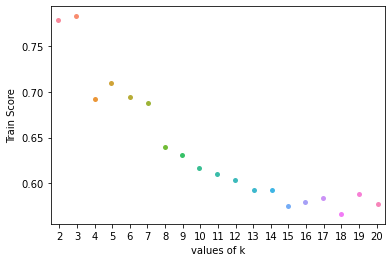

In [378]:
ax = sns.stripplot(K, list(train_scores_dict.values()));
ax.set(xlabel ='values of k', ylabel ='Train Score')  
plt.show()

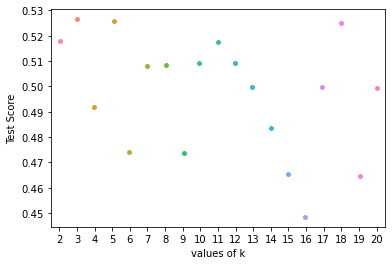

In [379]:
ax = sns.stripplot(K, list(test_scores_dict.values()));
ax.set(xlabel ='values of k', ylabel ='Test Score')  
plt.show()

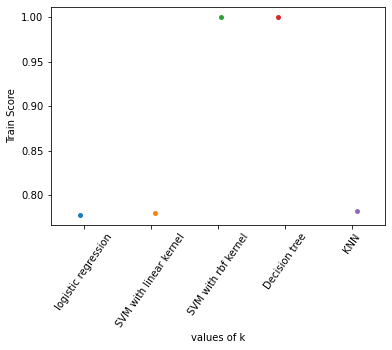

In [391]:
ax = sns.stripplot(list(model_accuracy.keys()), [x[0] for x in list(model_accuracy.values())]);
ax.set(xlabel ='values of k', ylabel ='Train Score')  
plt.xticks(rotation=55)
plt.show()

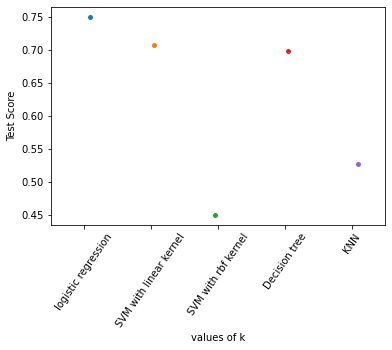

In [392]:
ax = sns.stripplot(list(model_accuracy.keys()), [x[1] for x in list(model_accuracy.values())]);
ax.set(xlabel ='values of k', ylabel ='Test Score')  
plt.xticks(rotation=55)
plt.show()